Here is my (barely) MVP, heh. My original plan was to group data for 4 stations (Times SQ, Wrld Trde Ctr, Whitehall S-Fry, 81 ST-Museum) associated with tourist locations and chart net entries according to day of the week and time of day.I had a lot of trouble grouping and aggregating data by time of day. Or at least the numbers it gave me didn't make sense.

But now that the project is due in 48 hours, I am thinking I might just plot entries by day of the week and pivot to describing how subway traffic around the tourist locations as come back since the pandemic, and forget grouping by time of day. We plotted by day of the week in the mta Pair3 exercise so I have skeleton code to look at. But to claim that metro traffic at those spots implies tourists seems like a weak assumption. 




In [4]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd

In [5]:
engine = create_engine("sqlite:////Users/nhuvelle/Documents/mta_data.db")

In [6]:
insp = inspect(engine)
print(insp.get_table_names())

['mta_data']


In [7]:
df = pd.read_sql('SELECT * FROM mta_data WHERE STATION == "WORLD TRADE CTR" or STATION == "TIMES SQ-42 ST" or STATION == "WHITEHALL S-FRY" or STATION == "81 ST-MUSEUM" ORDER BY STATION', engine)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,01:00:00,REGULAR,233581,82597
1,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,05:00:00,REGULAR,233583,82599
2,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,09:00:00,REGULAR,233610,82608
3,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,13:00:00,REGULAR,233691,82659
4,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,17:00:00,REGULAR,234016,82718
...,...,...,...,...,...,...,...,...,...,...,...
85451,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,07:00:00,REGULAR,674189,363419
85452,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,11:00:00,REGULAR,674194,363428
85453,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,15:00:00,REGULAR,674215,363443
85454,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,19:00:00,REGULAR,674257,363454


In [8]:
import datetime
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,01:00:00,REGULAR,233581,82597,2021-06-05 01:00:00
1,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,05:00:00,REGULAR,233583,82599,2021-06-05 05:00:00
2,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,09:00:00,REGULAR,233610,82608,2021-06-05 09:00:00
3,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,13:00:00,REGULAR,233691,82659,2021-06-05 13:00:00
4,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,17:00:00,REGULAR,234016,82718,2021-06-05 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
85451,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,07:00:00,REGULAR,674189,363419,2021-01-01 07:00:00
85452,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,11:00:00,REGULAR,674194,363428,2021-01-01 11:00:00
85453,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,15:00:00,REGULAR,674215,363443,2021-01-01 15:00:00
85454,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,19:00:00,REGULAR,674257,363454,2021-01-01 19:00:00


In [9]:
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,01:00:00,REGULAR,233581,82597,2021-06-05 01:00:00
1,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,05:00:00,REGULAR,233583,82599,2021-06-05 05:00:00
2,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,09:00:00,REGULAR,233610,82608,2021-06-05 09:00:00
3,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,13:00:00,REGULAR,233691,82659,2021-06-05 13:00:00
4,N044,R187,00-00-00,81 ST-MUSEUM,BC,IND,06/05/2021,17:00:00,REGULAR,234016,82718,2021-06-05 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
85451,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,07:00:00,REGULAR,674189,363419,2021-01-01 07:00:00
85452,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,11:00:00,REGULAR,674194,363428,2021-01-01 11:00:00
85453,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,15:00:00,REGULAR,674215,363443,2021-01-01 15:00:00
85454,N094,R029,01-06-03,WORLD TRADE CTR,ACE23,IND,01/01/2021,19:00:00,REGULAR,674257,363454,2021-01-01 19:00:00


In [10]:
df = df.drop(["EXITS", "DESC", "LINENAME", "DIVISION"], axis=1, errors="ignore")
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,DATE_TIME
0,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,01:00:00,233581,2021-06-05 01:00:00
1,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,05:00:00,233583,2021-06-05 05:00:00
2,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,09:00:00,233610,2021-06-05 09:00:00
3,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,13:00:00,233691,2021-06-05 13:00:00
4,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,17:00:00,234016,2021-06-05 17:00:00


In [11]:
df[["PREV_DATE_TIME", "PREV_ENTRIES"]] = (df.groupby(["STATION"])[["DATE_TIME", "ENTRIES"]].shift(1))
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES
0,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,01:00:00,233581,2021-06-05 01:00:00,NaT,NaN
1,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,05:00:00,233583,2021-06-05 05:00:00,2021-06-05 01:00:00,233581.0
2,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,09:00:00,233610,2021-06-05 09:00:00,2021-06-05 05:00:00,233583.0
3,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,13:00:00,233691,2021-06-05 13:00:00,2021-06-05 09:00:00,233610.0
4,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,17:00:00,234016,2021-06-05 17:00:00,2021-06-05 13:00:00,233691.0


In [12]:
#Drop the rows for the earliest date in the df
df.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,DATE_TIME,PREV_DATE_TIME,PREV_ENTRIES
1,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,05:00:00,233583,2021-06-05 05:00:00,2021-06-05 01:00:00,233581.0
2,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,09:00:00,233610,2021-06-05 09:00:00,2021-06-05 05:00:00,233583.0
3,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,13:00:00,233691,2021-06-05 13:00:00,2021-06-05 09:00:00,233610.0
4,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,17:00:00,234016,2021-06-05 17:00:00,2021-06-05 13:00:00,233691.0
5,N044,R187,00-00-00,81 ST-MUSEUM,06/05/2021,21:00:00,234258,2021-06-05 21:00:00,2021-06-05 17:00:00,234016.0


In [13]:
turnstiles_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A021,R032,01-00-00,TIMES SQ-42 ST,01/01/2021,9857895
1,A021,R032,01-00-00,TIMES SQ-42 ST,01/02/2021,9858158
2,A021,R032,01-00-00,TIMES SQ-42 ST,01/03/2021,9858598
3,A021,R032,01-00-00,TIMES SQ-42 ST,01/04/2021,9858858
4,A021,R032,01-00-00,TIMES SQ-42 ST,01/05/2021,9859870


In [14]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .shift(1))
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A021,R032,01-00-00,TIMES SQ-42 ST,01/01/2021,9857895,NaN,NaN
1,A021,R032,01-00-00,TIMES SQ-42 ST,01/02/2021,9858158,01/01/2021,9857895.0
2,A021,R032,01-00-00,TIMES SQ-42 ST,01/03/2021,9858598,01/02/2021,9858158.0
3,A021,R032,01-00-00,TIMES SQ-42 ST,01/04/2021,9858858,01/03/2021,9858598.0
4,A021,R032,01-00-00,TIMES SQ-42 ST,01/05/2021,9859870,01/04/2021,9858858.0


In [15]:
#Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [16]:
(turnstiles_daily["ENTRIES"] - turnstiles_daily["PREV_ENTRIES"]).describe()

count    1.418200e+04
mean    -1.058736e+00
std      1.198646e+05
min     -8.601911e+06
25%      7.600000e+01
50%      2.230000e+02
75%      4.020000e+02
max      8.574469e+06
dtype: float64

In [17]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].shape

(86, 8)

In [18]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
162,A021,R032,01-00-00,TIMES SQ-42 ST,12/26/2020,9853724,06/11/2021,9998998.0
330,A021,R032,01-00-01,TIMES SQ-42 ST,12/26/2020,4110097,06/11/2021,4184977.0
498,A021,R032,01-00-02,TIMES SQ-42 ST,12/26/2020,2886925,06/11/2021,2934155.0
666,A021,R032,01-00-03,TIMES SQ-42 ST,12/26/2020,2856132,06/11/2021,2890161.0
834,A021,R032,01-00-04,TIMES SQ-42 ST,12/26/2020,2559543,06/11/2021,2598629.0


In [19]:
# Let's see how many stations have this problem
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
     .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A   UNIT  SCP       STATION       
A021  R032  01-00-00  TIMES SQ-42 ST    1
            01-00-01  TIMES SQ-42 ST    1
            01-00-02  TIMES SQ-42 ST    1
            01-00-03  TIMES SQ-42 ST    1
            01-00-04  TIMES SQ-42 ST    1
                                       ..
R151  R033  00-00-04  TIMES SQ-42 ST    1
            00-00-05  TIMES SQ-42 ST    1
            00-00-06  TIMES SQ-42 ST    1
            00-00-07  TIMES SQ-42 ST    1
            00-00-08  TIMES SQ-42 ST    1
Length: 83, dtype: int64

In [20]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

entries: 190 <-- 2172453.0
entries: 2170781 <-- 28481.0
entries: 8 <-- 4735197.0
entries: 4712315 <-- 16703.0
entries: 262304 <-- 8864215.0
entries: 8854651 <-- 280182.0


In [21]:
turnstiles_daily.describe()

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
count,1.418200e+04,1.418200e+04,14182.000000
mean,6.658061e+07,6.658061e+07,874.404809
std,3.081068e+08,3.081068e+08,13514.749871
min,8.000000e+00,8.000000e+00,0.000000
25%,5.740280e+05,5.740280e+05,79.000000
50%,2.244584e+06,2.244584e+06,226.000000
75%,5.555060e+06,5.555060e+06,409.000000
max,1.720219e+09,1.720219e+09,701844.000000


In [22]:
turnstiles_daily.DAILY_ENTRIES.describe()

count     14182.000000
mean        874.404809
std       13514.749871
min           0.000000
25%          79.000000
50%         226.000000
75%         409.000000
max      701844.000000
Name: DAILY_ENTRIES, dtype: float64

In [23]:
station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A021,R032,TIMES SQ-42 ST,01/02/2021,787.0
1,A021,R032,TIMES SQ-42 ST,01/03/2021,1320.0
2,A021,R032,TIMES SQ-42 ST,01/04/2021,756.0
3,A021,R032,TIMES SQ-42 ST,01/05/2021,3256.0
4,A021,R032,TIMES SQ-42 ST,01/06/2021,3365.0


In [24]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,81 ST-MUSEUM,01/02/2021,1394.0
1,81 ST-MUSEUM,01/03/2021,2172.0
2,81 ST-MUSEUM,01/04/2021,1525.0
3,81 ST-MUSEUM,01/05/2021,2340.0
4,81 ST-MUSEUM,01/06/2021,2338.0


In [25]:
station_totals = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)

station_totals.head()

,STATION,DAILY_ENTRIES
1,TIMES SQ-42 ST,7704446.0
3,WORLD TRADE CTR,1991143.0
0,81 ST-MUSEUM,1667912.0
2,WHITEHALL S-FRY,1037308.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

In [27]:
station_daily_MUSEUM_av = station_daily[station_daily['STATION'] == '81 ST-MUSEUM'].copy()
station_daily_MUSEUM_av.head()

,STATION,DATE,DAILY_ENTRIES
0,81 ST-MUSEUM,01/02/2021,1394.0
1,81 ST-MUSEUM,01/03/2021,2172.0
2,81 ST-MUSEUM,01/04/2021,1525.0
3,81 ST-MUSEUM,01/05/2021,2340.0
4,81 ST-MUSEUM,01/06/2021,2338.0


Text(0.5, 1.0, 'Daily Entries for 81 ST-MUSEUM')

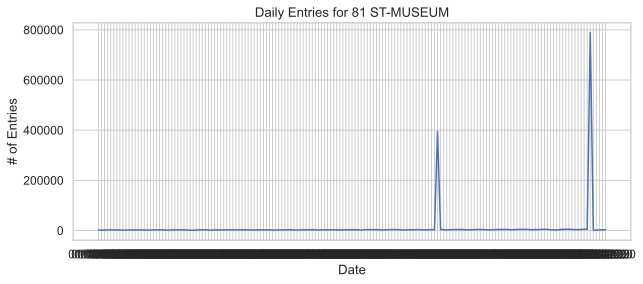

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_MUSEUM_av['DATE'], station_daily_MUSEUM_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
#plt.xticks(rotation=45)
plt.title('Daily Entries for 81 ST-MUSEUM')

In [29]:
station_daily_MUSEUM_av['DAILY_ENTRIES'].max()

788702.0

In [30]:
station_daily_MUSEUM_av[station_daily_MUSEUM_av['DAILY_ENTRIES'] == station_daily_MUSEUM_av['DAILY_ENTRIES'].max()]

,STATION,DATE,DAILY_ENTRIES
161,81 ST-MUSEUM,12/26/2020,788702.0


In [31]:
station_daily_MUSEUM_av.describe()

,DAILY_ENTRIES
count,167.000000
mean,9987.497006
std,67791.206629
min,901.000000
25%,2407.000000
50%,2836.000000
75%,3502.500000
max,788702.000000


In [32]:
station_daily_MUSEUM_av.drop(161, axis=0, inplace=True)
station_daily_MUSEUM_av.describe()

,DAILY_ENTRIES
count,166.000000
mean,5296.445783
std,30434.056957
min,901.000000
25%,2403.000000
50%,2835.000000
75%,3482.750000
max,394886.000000


In [33]:
station_daily_MUSEUM_av['DAILY_ENTRIES'].max()

394886.0

In [34]:
station_daily_MUSEUM_av[station_daily_MUSEUM_av['DAILY_ENTRIES'] == station_daily_MUSEUM_av['DAILY_ENTRIES'].max()]

,STATION,DATE,DAILY_ENTRIES
111,81 ST-MUSEUM,04/23/2021,394886.0


In [35]:
station_daily_MUSEUM_av.drop(111, axis=0, inplace=True)
station_daily_MUSEUM_av.describe()

,DAILY_ENTRIES
count,165.000000
mean,2935.296970
std,884.663035
min,901.000000
25%,2399.000000
50%,2834.000000
75%,3473.000000
max,5399.000000


Text(0.5, 1.0, 'Daily Entries for 81 ST-MUSEUM')

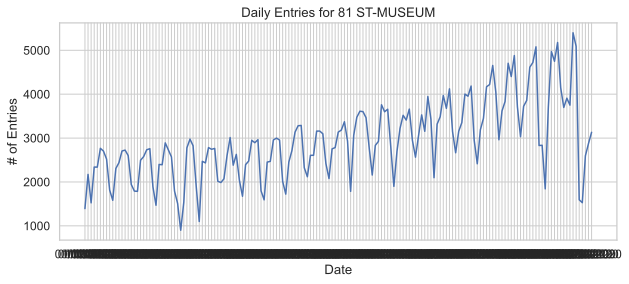

In [36]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_MUSEUM_av['DATE'], station_daily_MUSEUM_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
#plt.xticks(rotation=45)
plt.title('Daily Entries for 81 ST-MUSEUM')

In [37]:
station_daily_42_ST_av = station_daily[station_daily['STATION'] == 'TIMES SQ-42 ST'].copy()
station_daily_42_ST_av.head()

,STATION,DATE,DAILY_ENTRIES
167,TIMES SQ-42 ST,01/02/2021,7581.0
168,TIMES SQ-42 ST,01/03/2021,12319.0
169,TIMES SQ-42 ST,01/04/2021,6021.0
170,TIMES SQ-42 ST,01/05/2021,16338.0
171,TIMES SQ-42 ST,01/06/2021,16317.0


Text(0.5, 1.0, 'Daily Entries for TIMES SQ 42-ST Station')

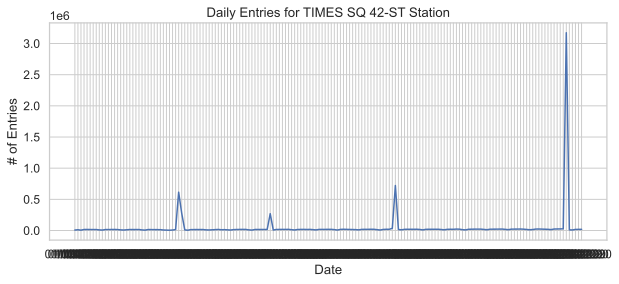

In [45]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_42_ST_av['DATE'], station_daily_42_ST_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
#plt.xticks(rotation=45)
plt.title('Daily Entries for TIMES SQ 42-ST Station')

In [60]:
station_daily_42_ST_av[station_daily_42_ST_av['DAILY_ENTRIES'] == station_daily_42_ST_av['DAILY_ENTRIES'].max()]

,STATION,DATE,DAILY_ENTRIES
231,TIMES SQ-42 ST,03/07/2021,269813.0


In [77]:
station_daily_42_ST_av['DAILY_ENTRIES'].max()
#Will probably shave this down later, but maybe there was a big even in Times Square on this day

35152.0

Text(0.5, 1.0, 'Daily Entries for TIMES SQ 42-ST Station')

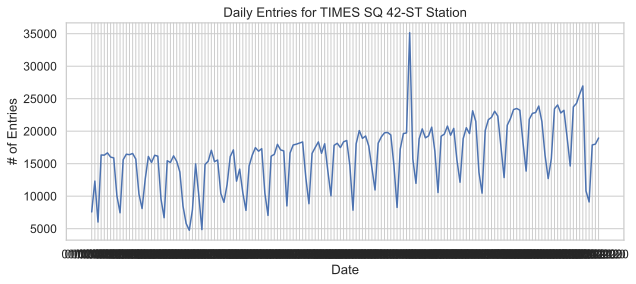

In [62]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_42_ST_av['DATE'], station_daily_42_ST_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
#plt.xticks(rotation=45)
plt.title('Daily Entries for TIMES SQ 42-ST Station')

In [39]:
station_daily_WHITEHALL_av = station_daily[station_daily['STATION'] == 'WHITEHALL S-FRY'].copy()
station_daily_WHITEHALL_av.head()

,STATION,DATE,DAILY_ENTRIES
334,WHITEHALL S-FRY,01/02/2021,1363.0
335,WHITEHALL S-FRY,01/03/2021,2022.0
336,WHITEHALL S-FRY,01/04/2021,1119.0
337,WHITEHALL S-FRY,01/05/2021,3180.0
338,WHITEHALL S-FRY,01/06/2021,3122.0


Text(0.5, 1.0, 'Daily Entries for WHITEHALL S-FRY Station')

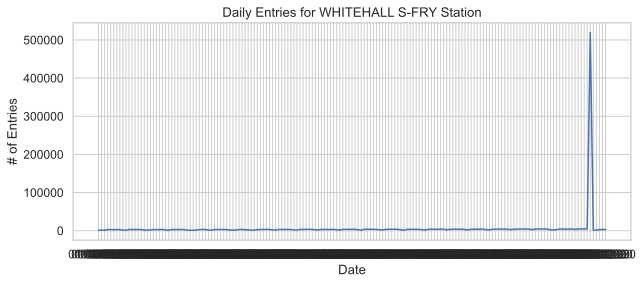

In [40]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_WHITEHALL_av['DATE'], station_daily_WHITEHALL_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
#plt.xticks(rotation=45)
plt.title('Daily Entries for WHITEHALL S-FRY Station')

In [41]:
station_daily_WHITEHALL_av['DAILY_ENTRIES'].max()

519096.0

In [42]:
station_daily_WHITEHALL_av[station_daily_WHITEHALL_av['DAILY_ENTRIES'] == station_daily_WHITEHALL_av['DAILY_ENTRIES'].max()]

,STATION,DATE,DAILY_ENTRIES
495,WHITEHALL S-FRY,12/26/2020,519096.0


In [43]:
station_daily_WHITEHALL_av.drop(495, axis=0, inplace=True)
station_daily_WHITEHALL_av.describe()

,DAILY_ENTRIES
count,166.000000
mean,3121.759036
std,959.161643
min,1119.000000
25%,2367.750000
50%,3283.000000
75%,3760.000000
max,4876.000000


Text(0.5, 1.0, 'Daily Entries for WHITEHALL S-FRY Station')

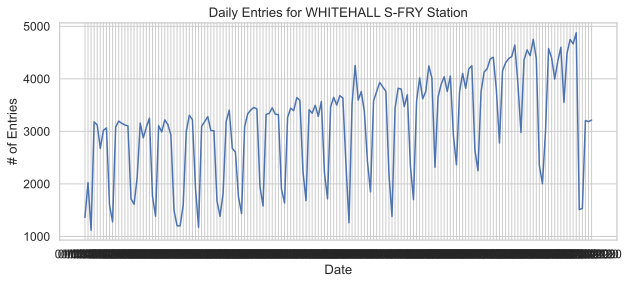

In [44]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_WHITEHALL_av['DATE'], station_daily_WHITEHALL_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
#plt.xticks(rotation=45)
plt.title('Daily Entries for WHITEHALL S-FRY Station')